### Importing libraries

In [14]:
import numpy as np
import os
from pathlib import Path
from matplotlib import pyplot as plt
from keras.preprocessing import image
import pandas as pd

### Reading File -> maps filename with label

In [15]:
train_data = pd.read_csv('Train/train.csv')
train_data.head()

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


### Dataset Preparation

In [66]:
p = Path("./Train/Images")

dirs = p.glob("*")

labels_dict = {"Pikachu":0,"Bulbasaur":1,"Charmander":2}

image_data = []
labels = []

for folder_dir in dirs:
    
    label = str(folder_dir).split("\\")[-1]
#     print(label)
    
    img = image.load_img(folder_dir,target_size=(32,32))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    i = train_data[train_data['ImageId']==label]
    i = i.values
    labels.append(labels_dict[i[0][1]])

C:\Users\sartj\anaconda3\envs\tensorflow_env\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [67]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [68]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape,labels.shape)

(304, 32, 32, 3) (304,)


### Randomly shuffle data

In [69]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

#Unzip
image_data[:],labels[:] = zip(*combined)

### Visualise data

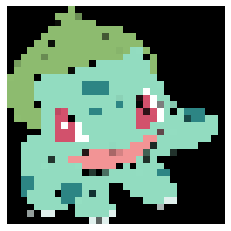

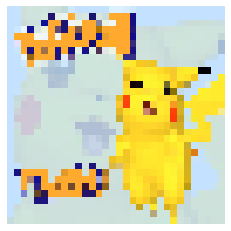

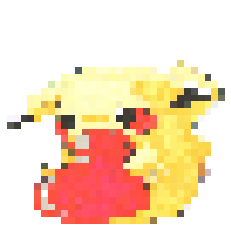

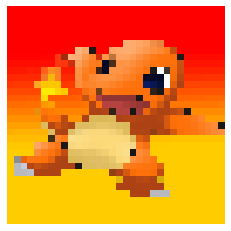

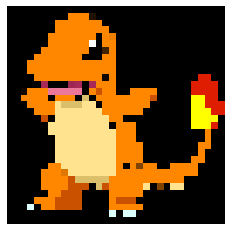

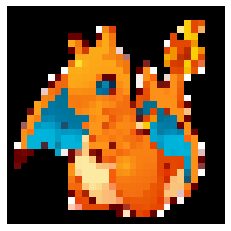

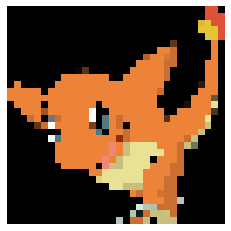

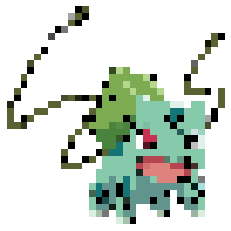

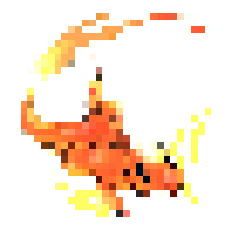

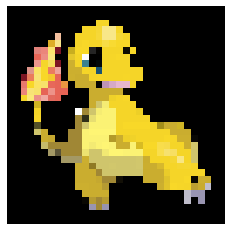

In [70]:
from matplotlib import pyplot as plt

def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()    
    return 

for i in range(10):
    drawImg(image_data[i])

## SVM Classifier

In [71]:
class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

## Converting data for ovo classification

In [72]:

M = image_data.shape[0] 
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(304, 3072)
(304,)


In [73]:
CLASSES = len(np.unique(labels))
print(CLASSES)

3


In [74]:
def classWiseData(x,y):
    data = {}
    
    for i in range(CLASSES):
        data[i] = []
        
    for j in range(x.shape[0]):
        data[labels_dict[y[j]]].append(x[j])
    
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [75]:
data = classWiseData(image_data,labels)

KeyError: 1

In [ ]:
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)

In [ ]:

def getDataPairForSVM(d1,d2):
    """Combines Data of two classes into a signle matrix"""
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels

## Training NC2 SVM's

In [ ]:
mySVM  = SVM()
xp, yp  = getDataPairForSVM(data[0],data[1])
w,b,loss  = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
#print(loss)
plt.plot(loss)

In [ ]:

def trainSVMs(x,y):
    
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    
    return svm_classifiers

In [ ]:
svm_classifiers = trainSVMs(image_data,labels)

In [ ]:
pikachu_bulbasaur = svm_classifiers[0][1]
pikachu_charmander = svm_classifiers[0][2]
print(pikachu_bulbasaur[0].shape)
print(pikachu_bulbasaur[1])

## Prediction

In [ ]:
def binaryPredict(x,w,b):
    z  = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [ ]:
def predict(x):
    
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [76]:
print(predict(image_data[0]))
print(labels[0])

1
1


In [77]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [78]:
accuracy(image_data,labels)

0.6118421052631579

## Testing Data

In [81]:
test_data = pd.read_csv("./Test/test.csv")
test_data.head()

,ImageId
0,1106.jpg
1,2236.jpg
2,1131.jpg
3,2221.jpg
4,2011.jpg


In [112]:
p2 = Path("./Test/Images")

dirs_2 = p2.glob("*")

image_data_2 = []
image_id_2=[]

for folder_dir in dirs_2:
    
    label = str(folder_dir).split("\\")[-1]
#     print(label)

    img = image.load_img(folder_dir,target_size=(32,32))
    img_array = image.img_to_array(img)
    image_data_2.append(img_array)
    image_id_2.append(label)

In [114]:
image_data_2 = np.array(image_data_2,dtype='float32')/255.0
image_id_2 = np.array(image_id_2)

print(image_data_2.shape,image_id_2.shape)

(123, 32, 32, 3) (123,)


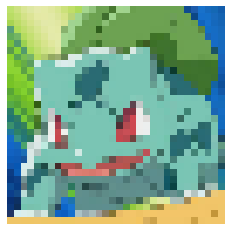

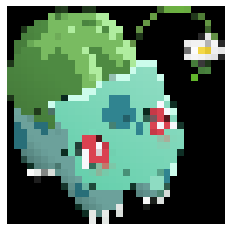

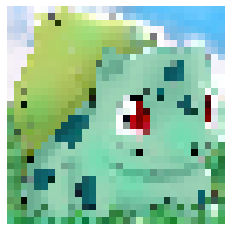

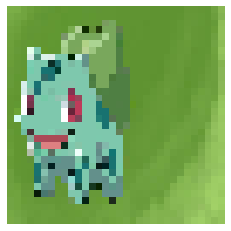

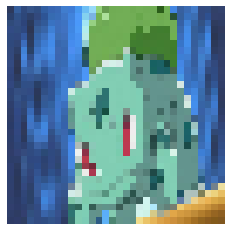

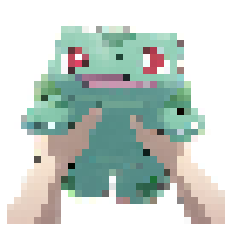

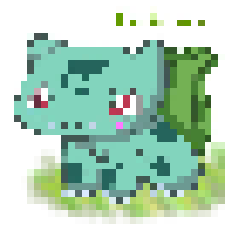

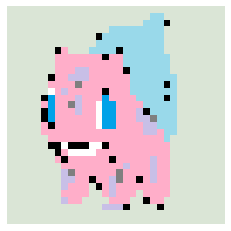

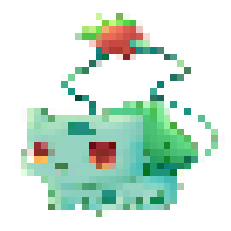

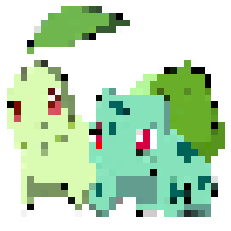

In [99]:
from matplotlib import pyplot as plt

def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()    
    return 

for i in range(10):
    drawImg(image_data_2[i])

In [115]:
N = image_data_2.shape[0] 
image_data_2 = image_data_2.reshape(N,-1)
print(image_data_2.shape)

(123, 3072)


In [116]:
test_data = np.array(test_data)
test_data.shape

(123, 1)

In [149]:
labels_dict = {"Pikachu":0,"Bulbasaur":1,"Charmander":2}
names_dict = {0:"Pikachu",1:"Bulbasaur",2:"Charmander"}

In [152]:
result=[]

for i in test_data:
#     print(i[0])
    index = np.where(image_id_2==i)
    pred = predict(image_data_2[index])
    result.append((i[0],names_dict[pred]))

In [153]:
len(result)

123

In [154]:
res = pd.DataFrame(data=result,columns=['ImageId','NameOfPokemon'])

In [155]:
res.head()

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Charmander


In [157]:
res.to_csv('result.csv',index = False)